In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Desktop/CC_data.csv')

   Male  Age   Debt  Married  BankCustomer  EducationLevel  Ethnicity  \
0     1  156  0.000        2             1              13          8   
1     0  328  4.460        2             1              11          4   
2     0   89  0.500        2             1              11          4   
3     1  125  1.540        2             1              13          8   
4     1   43  5.625        2             1              13          8   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

   Citizen  ZipCode  Income  Approved  
0        0       42       0         0  
1        0      118     560         0  
2 

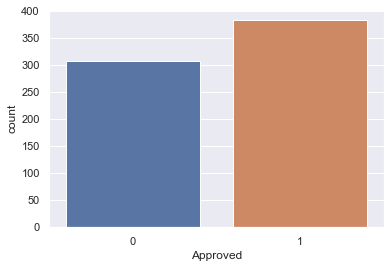

In [24]:
print(data.head())
sns.countplot(data = data, x = 'Approved')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [5]:
data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
data.tail(20)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240,117,-
673,?,29.5,2.000,y,p,e,h,2.000,f,f,0,f,g,256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,0,0,-


In [7]:
#We then have 2 problems that affect the performance of any machine learning model
#nan values is replaced with '?'
#data ranges differently for each feature ,so we should scale it

data.replace('?',np.nan,inplace=True)

#filling missing values

data.fillna(data.mean(),inplace=True)
data.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [8]:
#Handling missing values of text columns

for col in data.columns:
    # Check if the column is of object type
    if data[col].dtypes == 'object':
        # Impute with the most frequent value
        data = data.fillna(data[col].value_counts().index[0])

data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [15]:
# Convert non-numeric data into numeric

print(data.head())
print(data.info())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])
print(data.head())
print(data.info())


   Male  Age   Debt  Married  BankCustomer  EducationLevel  Ethnicity  \
0     1  156  0.000        2             1              13          8   
1     0  328  4.460        2             1              11          4   
2     0   89  0.500        2             1              11          4   
3     1  125  1.540        2             1              13          8   
4     1   43  5.625        2             1              13          8   

   YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0           1.25             1         1            1               0   
1           3.04             1         1            6               0   
2           1.50             1         0            0               0   
3           3.75             1         1            5               1   
4           1.71             1         0            0               0   

   Citizen  ZipCode  Income  Approved  
0        0       42       0         0  
1        0      118     560         0  
2 

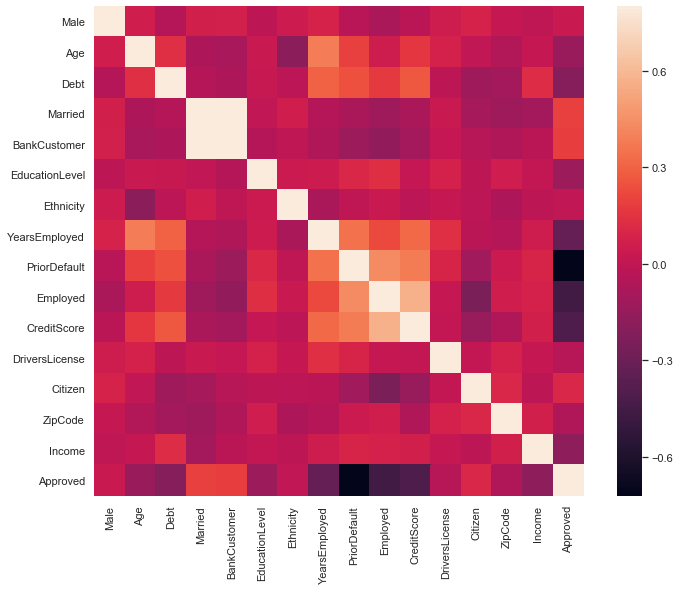

In [22]:
# Doing Some EDA on data

#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


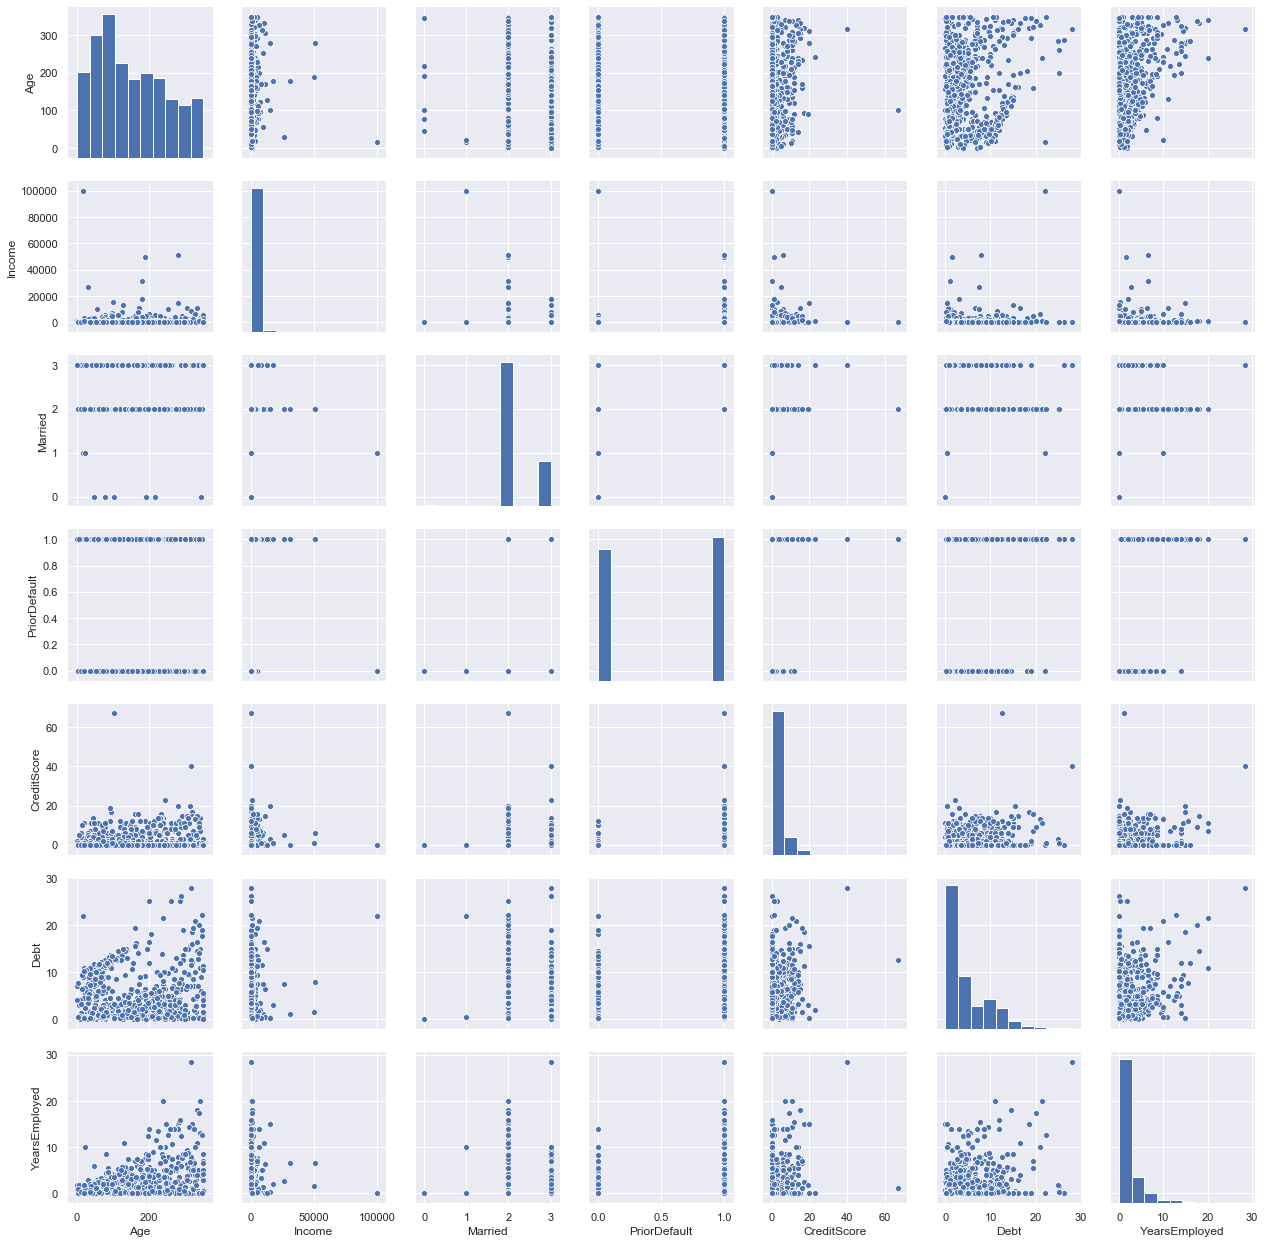

In [26]:

#scatterplot of some columns
sns.set()
cols = ['Age', 'Income','Married','PriorDefault', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(data[cols], height = 2.5)
plt.show()


In [29]:
# splitting data into train, val

from sklearn.model_selection import train_test_split

#from corrleation heatmap we notice zero correlation for DriversLicense and ZipCode
data = data.drop(['DriversLicense', 'ZipCode'], axis=1)
data = data.values # numpy array
X = data[:,:13]
y = data[:,13]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [35]:
# Scaling our data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [31]:
#Choosing our ML model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Evalutaion of our model using confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(rescaledX_test)
print(confusion_matrix(y_test,y_pred))
print(logreg.score(rescaledX_test,y_test))

[[74  8]
 [19 72]]
0.8439306358381503


In [40]:
#Chossing num_iters and tolerance for stopping criteria using grid search

from sklearn.model_selection import GridSearchCV

tol = [0.01,0.001,0.0001,0.0003]
max_iter = [100,150,200,300]

param_grid = dict(tol=tol,max_iter=max_iter)

grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
rescaledX = scaler.fit(X)
grid_model_result = grid_model.fit(X, y)
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score,best_params))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Best: 0.846377 using {'max_iter': 100, 'tol': 0.0001}


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile